## Superstore Sales Analysis for Business Insights

_A Complete Analytics Project_

**Introduction**
The Sample Superstore dataset contains sales records from a fictional retail company, covering four years of transactions across different regions, product categories, and customer segments.  
This project aims to extract actionable business insights such as:
- Identifying top-performing products and regions.
- Understanding profit trends and delivery performance.
- Highlighting potential loss-making areas.


## Data Cleaning & Initial Exploration

Show df.info(), df.describe(), df.head() and df.columns to get a quick sense of structure (types, nulls, ranges).
**Why:** this helps detect obvious issues (wrong types, many missing values, absurd outliers) before any cleaning.
**What to report:** number of rows, key columns, and any surprising datatypes (e.g., numbers stored as strings).

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

In [3]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

**Dataset informations**

In [4]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Remove Duplicates**

Check for and remove exact duplicate rows.
**Why:** duplicates inflate counts and distort aggregated metrics like total sales or average delivery time.
**Quick check:** df.duplicated().sum() and show a sample of duplicate rows before dropping.

In [5]:
df.duplicated().sum() #How many duplicates?
df = df.drop_duplicates()

**Check & Handle Missing Values**

Identify columns with missing values and decide how to handle them (drop, impute, or leave).
**Why:** missing data can bias results or break plotting/aggregation; dealing with it early prevents wasted work downstream.
**How to decide:** if a column has few nulls, consider row drop; if many and important, impute or flag as unknown.

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Convert Date Columns**

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Correlation Matrix (Numerical columns only)**

In [8]:
df.corr(numeric_only=True)

Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

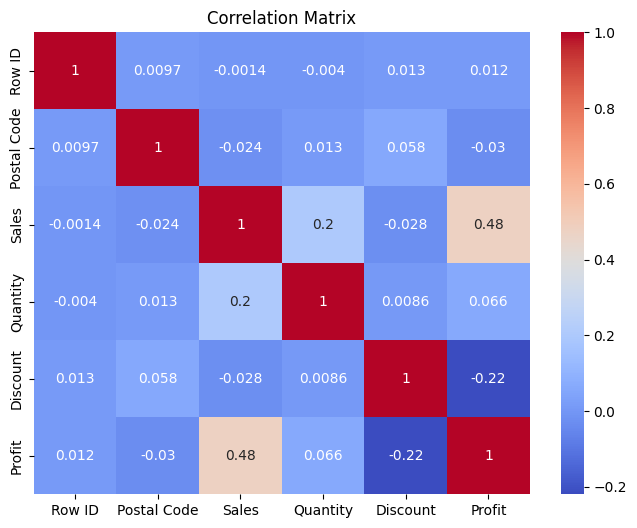

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only = True), annot= True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Delivery Time (in days)**

In [11]:
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [12]:
df[['Ship Date','Order Date','Delivery Time']].head()

Ship Date Order Date  Delivery Time
0 2016-11-11 2016-11-08              3
1 2016-11-11 2016-11-08              3
2 2016-06-16 2016-06-12              4
3 2015-10-18 2015-10-11              7
4 2015-10-18 2015-10-11              7

 **Profit Margin %**

In [24]:
df['Profit Margin %'] = np.where(df['Sales'] != 0,
                                 df['Profit'] / df['Sales'] * 100,
                                 np.nan)   # or 0 if you prefer


In [25]:
df[['Profit','Sales','Profit Margin %','Delivery Time']].head()

Profit     Sales  Profit Margin %  Delivery Time
0   41.9136  261.9600            16.00              3
1  219.5820  731.9400            30.00              3
2    6.8714   14.6200            47.00              4
3 -383.0310  957.5775           -40.00              7
4    2.5164   22.3680            11.25              7

## Feature Engineering & Visualizations

Create derived columns such as Delivery Time (days), Order Year, Order Month, Profit Margin (=Profit/Sales), or Is_Returned if return data exists.
**Why:** engineered features often provide the most direct answers to business questions (e.g., long delivery → higher returns; low profit margin categories).
**What to check:** sensible value ranges (no negative delivery days), handle division-by-zero safely when computing margins.



**Convert Order Date to datetime format**

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create new columns for year and month
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

**Sales & Profit Over Time**

In [27]:
monthly_sales = df.groupby(['Order Year', 'Order Month'])[['Sales','Profit']].sum().reset_index()

monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str))


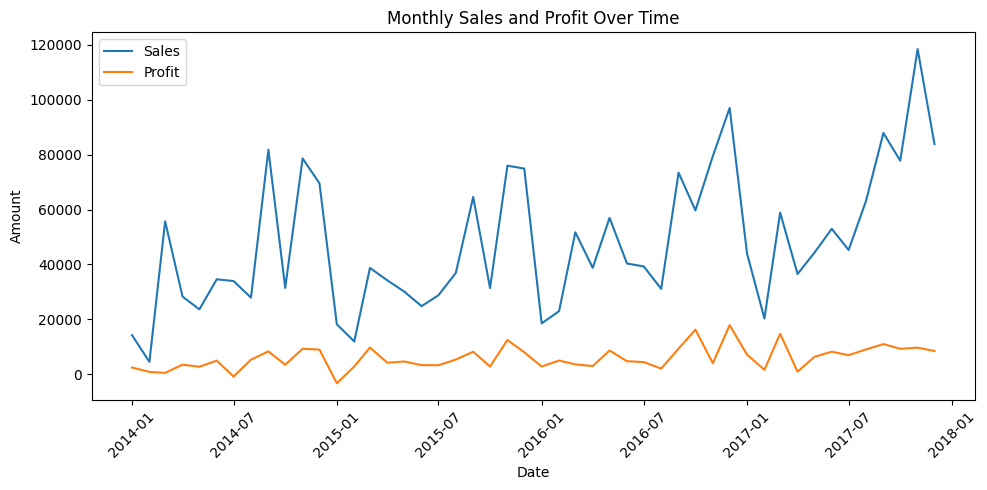

In [28]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Sales'], label='Sales')
plt.plot(monthly_sales['Month-Year'], monthly_sales['Profit'], label='Profit')

plt.legend()
plt.title("Monthly Sales and Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Top & Bottom Performing Categories/Sub-Categories**

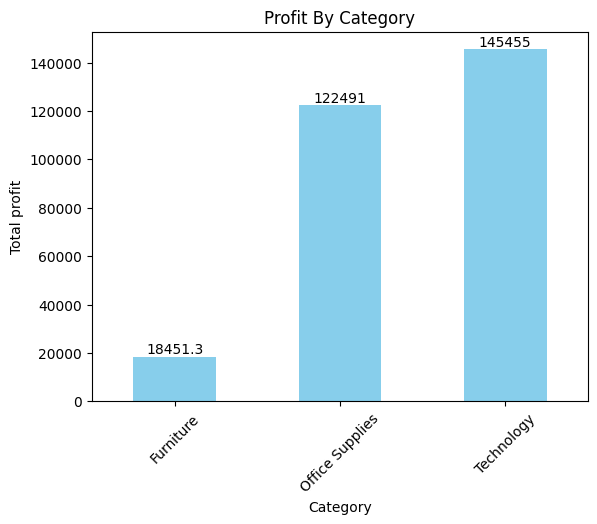

In [29]:
ax = df.groupby('Category')['Profit'].sum().sort_values().plot(kind = 'bar', color = 'skyblue')
plt.title("Profit By Category")
plt.ylabel("Total profit")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

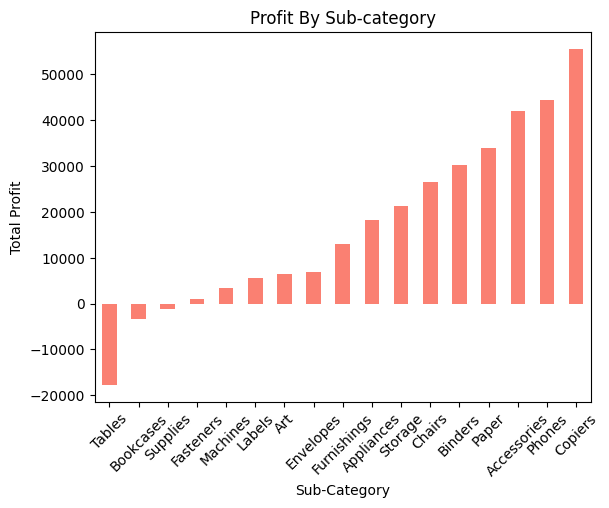

In [30]:
ax = df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='bar', color = 'salmon')
plt.title("Profit By Sub-category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

**Profit Margin Analysis**

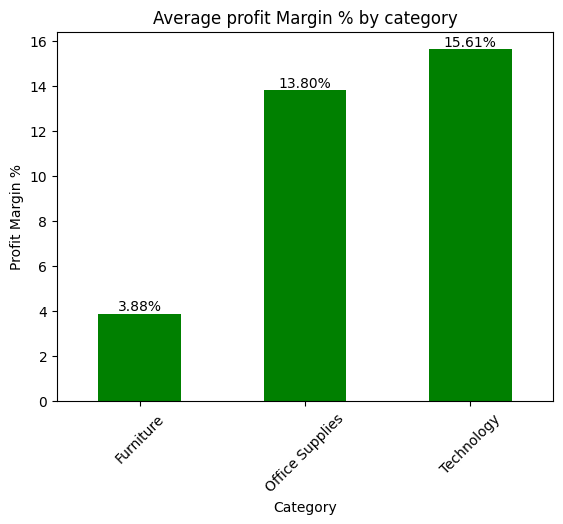

In [31]:
ax = df.groupby('Category')['Profit Margin %'].mean().sort_values().plot(kind='bar', color = 'green')
plt.title("Average profit Margin % by category")
plt.ylabel("Profit Margin %")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
plt.show()

**Delivery Time Analysis**

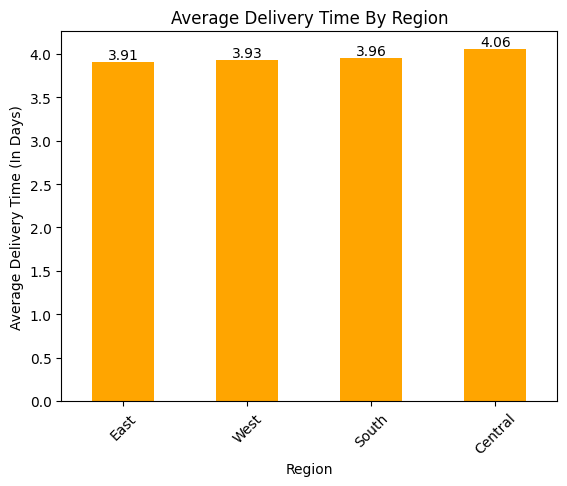

In [32]:
ax = df.groupby('Region')['Delivery Time'].mean().sort_values().plot(kind= 'bar', color = 'orange')
plt.title("Average Delivery Time By Region")
plt.ylabel("Average Delivery Time (In Days)")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt = '%.2f')
plt.show()

 **Delivery Time vs Profit Margin by Region**

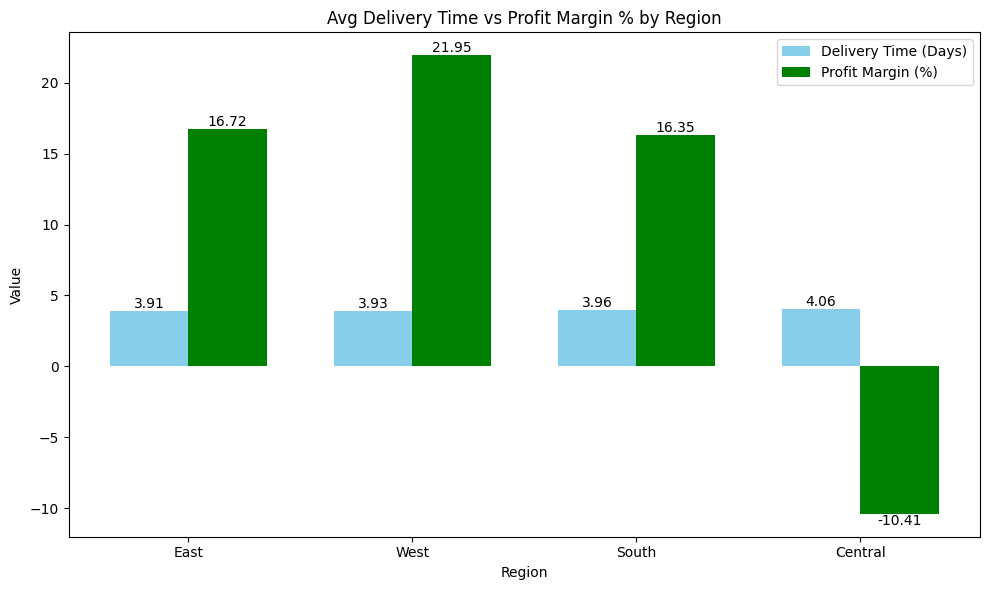

In [33]:
grouped = df.groupby('Region')[['Delivery Time', 'Profit Margin %']].mean().sort_values('Delivery Time')

regions = grouped.index
delivery_time = grouped['Delivery Time']
profit_margin = grouped['Profit Margin %']

x = np.arange(len(regions))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, delivery_time, width, label='Delivery Time (Days)', color='skyblue')
bar2 = ax.bar(x + width/2, profit_margin, width, label='Profit Margin (%)', color='green')

ax.set_xlabel('Region')
ax.set_ylabel('Value')
ax.set_title('Avg Delivery Time vs Profit Margin % by Region')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()

ax.bar_label(bar1, fmt='%.2f')
ax.bar_label(bar2, fmt='%.2f')

plt.tight_layout()
plt.show()

**Discount Impact on Profit**

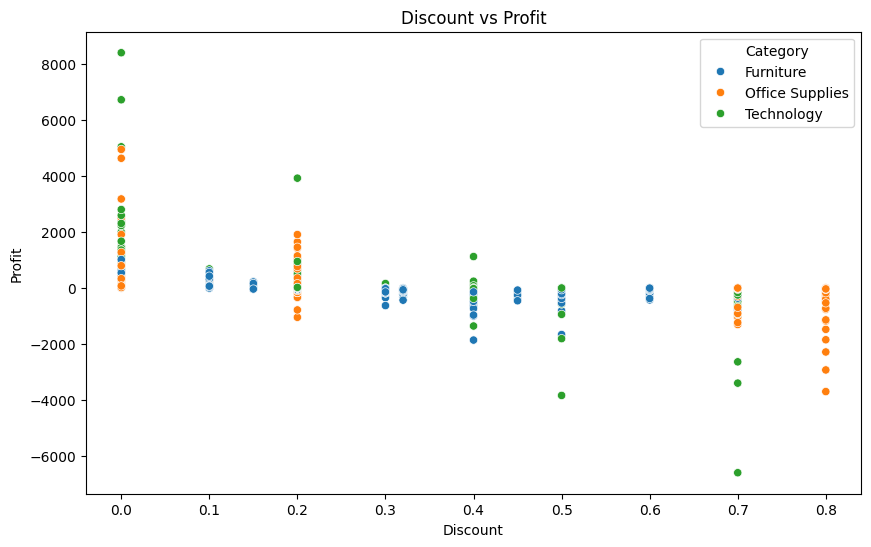

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit")
plt.show()

## Advanced Visualizations & Insights

**Correlation Heatmap**

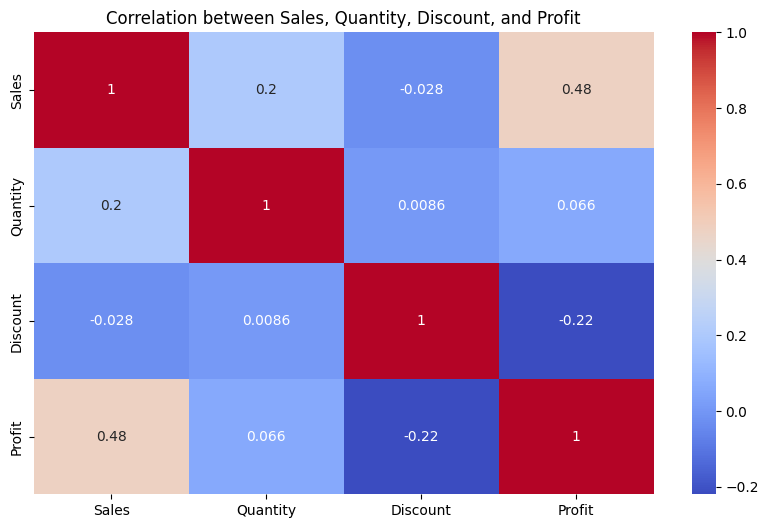

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation between Sales, Quantity, Discount, and Profit")
plt.show()

Category-wise Profit Analysis

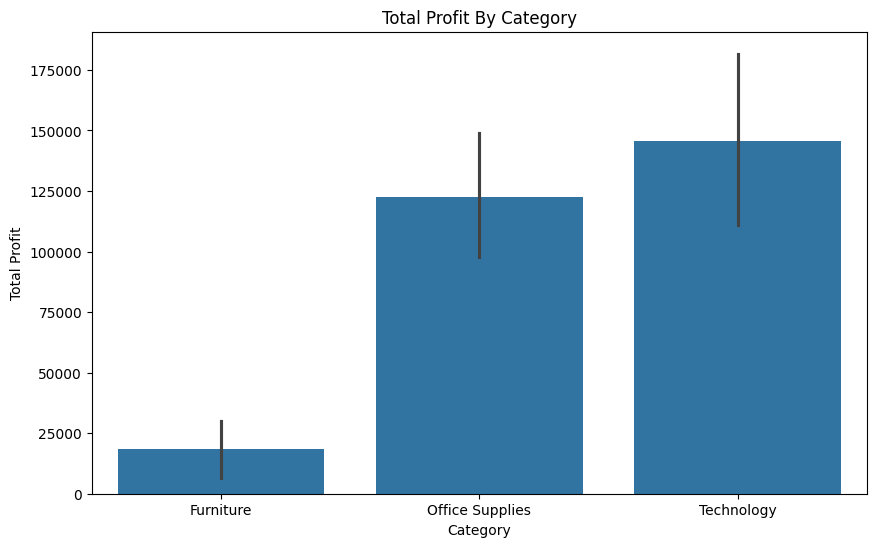

In [36]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df, x = 'Category', y = 'Profit', estimator = sum)
plt.title("Total Profit By Category")
plt.ylabel("Total Profit")
plt.show()


 Sub-Category Wise Profit & Sales

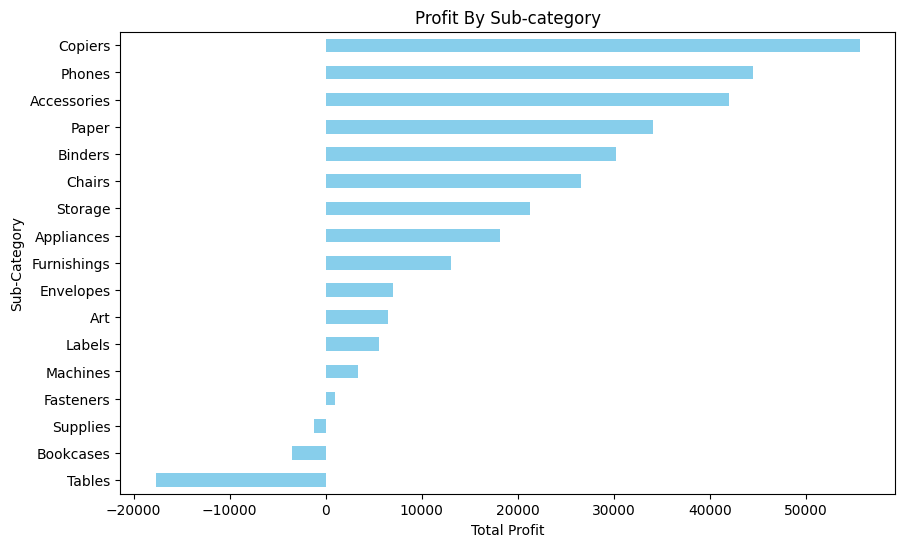

In [37]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.plot(kind = 'barh', figsize=(10,6), color = 'skyblue')
plt.title("Profit By Sub-category")
plt.xlabel('Total Profit')
plt.show()

 Delivery Time Analysis by Region


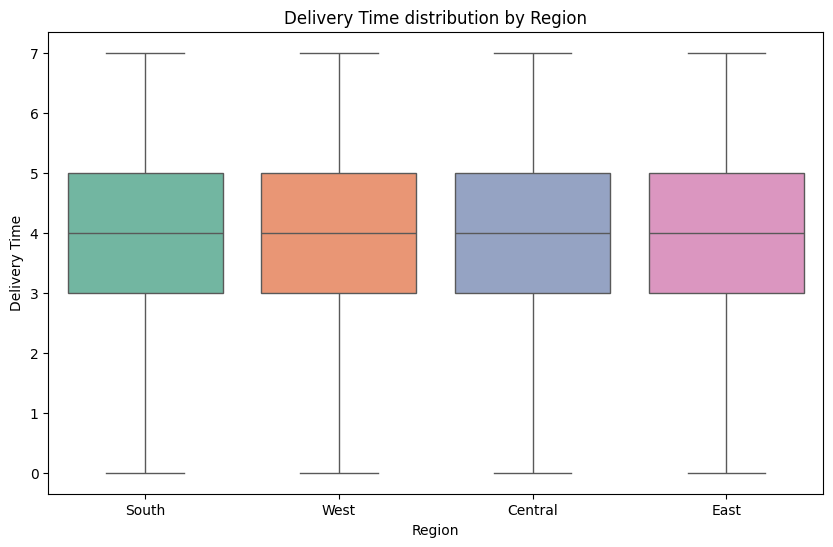

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'Region', y = 'Delivery Time', hue='Region', palette = 'Set2')
plt.title("Delivery Time distribution by Region")
plt.show()

 Profit by Segment and Region

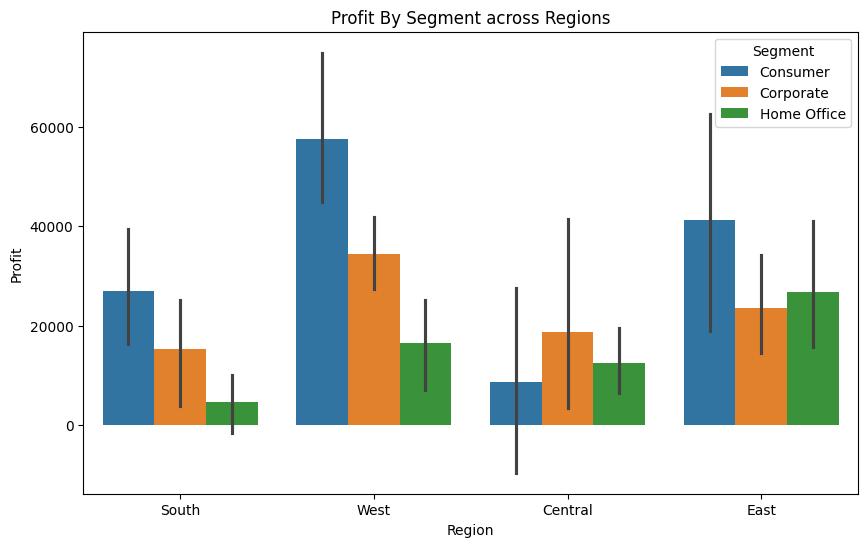

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = 'Region', y = 'Profit', hue = 'Segment', estimator = sum)
plt.title("Profit By Segment across Regions")
plt.show()



This week, I explored deeper relationships in the Superstore dataset using advanced data visualizations. I created a correlation heatmap to understand how numerical features like sales, discount, and profit are related. I also visualized category-wise and sub-category-wise profits to identify which product areas are more profitable. Additionally, I analyzed delivery time across regions and plotted profit distribution by segment and region. These insights helped in understanding performance variations across business segments and geographical regions.




**Statistical Analysis & Pivot Tables**

 Descriptive Statistics

In [40]:
# Descriptive statistics for numerical columns
df.describe()


Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00  90008.000000    209.940000     5.000000   
max              2018-01-05 00:00:00  99301.000000  22638.480000    14.000000   
std                              NaN  32063.693350    623.245101     2.225110   

          Discount       Profit  Delivery Time  Profit Margin %   Order Year  \
count  9994.000000  9994.000000    9994.000000      9994.000000  9994.000000   
mean      0.156203    28.656896       3.958175        12.031393  2015.722233   
min       0.000000 -6599.978000       0.000000      -275.000000  2014.000000   
25%       0.000000     1.728750       3.000000         7.500000  2015.000000   
50%       0.200000     8.666500       4.000000        27.000000  2016.000000   
75%       0.200000    29.364000       5.000000        36.250000  2017.000000   
max       0.800000  8399.976000       7.000000        50.000000  2017.000000   
std       0.206452   234.260108       1.747567        46.675435     1.123555   

       Order Month  
count  9994.000000  
mean      7.809686  
min       1.000000  
25%       5.000000  
50%       9.000000  
75%      11.000000  
max      12.000000  
std       3.284654

Group-wise Summary using groupby()

In [41]:
# Average Sales and Profit By Segment
df.groupby('Segment')[['Sales','Profit']].mean()

Sales     Profit
Segment                           
Consumer     223.733644  25.836873
Corporate    233.823300  30.456667
Home Office  240.972041  33.818664

In [42]:
# Average Sales and profit by category
df.groupby('Category')[['Sales','Profit']].mean()

Sales     Profit
Category                              
Furniture        349.834887   8.699327
Office Supplies  119.324101  20.327050
Technology       452.709276  78.752002

Pivot table: Profit by Region and Segment

In [43]:
pivot_table = pd.pivot_table(df, values = 'Profit', index = 'Region', columns = 'Segment', aggfunc ='sum')
print(pivot_table)

Segment    Consumer   Corporate  Home Office
Region                                      
Central   8564.0481  18703.9020   12438.4124
East     41190.9843  23622.5789   26709.2168
South    26913.5728  15215.2232    4620.6343
West     57450.6040  34437.4299   16530.4150


Heatmap of Pivot Table

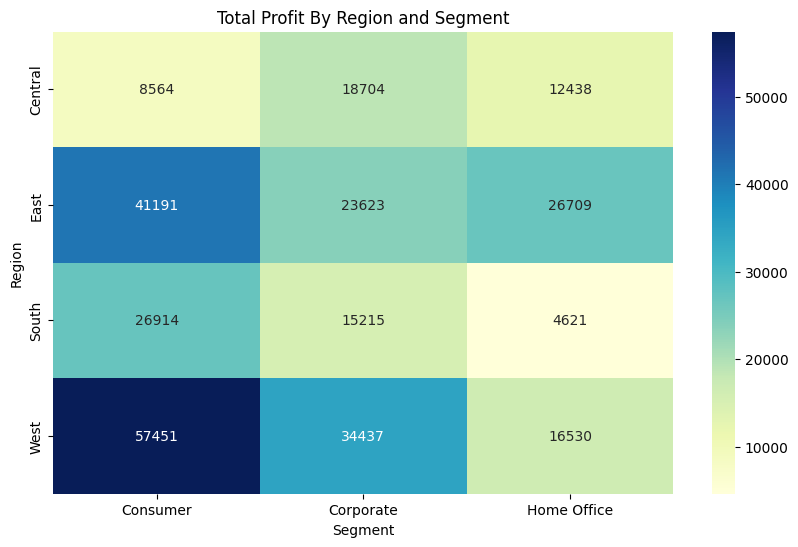

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot = True, cmap= 'YlGnBu', fmt='.0f')
plt.title("Total Profit By Region and Segment")
plt.show()

Count of Orders by State

In [45]:
order_counts = df['State'].value_counts().head(10)
print(order_counts)

State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64


Interactive Dashboard with Plotly

In [46]:
!pip install plotly

In [47]:
import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.express as px

# Total sales by region
fig1 = px.bar(data_frame=df.groupby("Region")["Sales"].sum().reset_index(),
             x="Region", y="Sales", title="Total Sales by Region")
fig1.show()

# Sales by segment and region
fig2 = px.bar(data_frame=df.groupby(["Segment","Region"])['Sales'].sum().reset_index(),
              x="Region", y="Sales", title="Total Sales By region")
fig2.show()

#Drill-dwon: Sales by category and Sub-category
fig3 = px.sunburst(df, path=["Category","Sub-Category"], values = "Sales",
                  title="Sales Drill-down: category > Sub-Category")
fig3.show()

## Time Series & Date Handling
Aggregate sales and profit by month or quarter and plot trends.
**Why:** trend charts reveal seasonality, growth/decline, and the effect of promotions or external events.
**What to comment:** note peak months, any deteriorating profit trend even as sales rise, and seasonal patterns.

**Convert Order Date to datetime format**

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [49]:
# Create new columns for Year, Month, and Quarter
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.to_period('Q')

**Plot sales trends over time using line charts**

<function matplotlib.pyplot.show(close=None, block=None)>

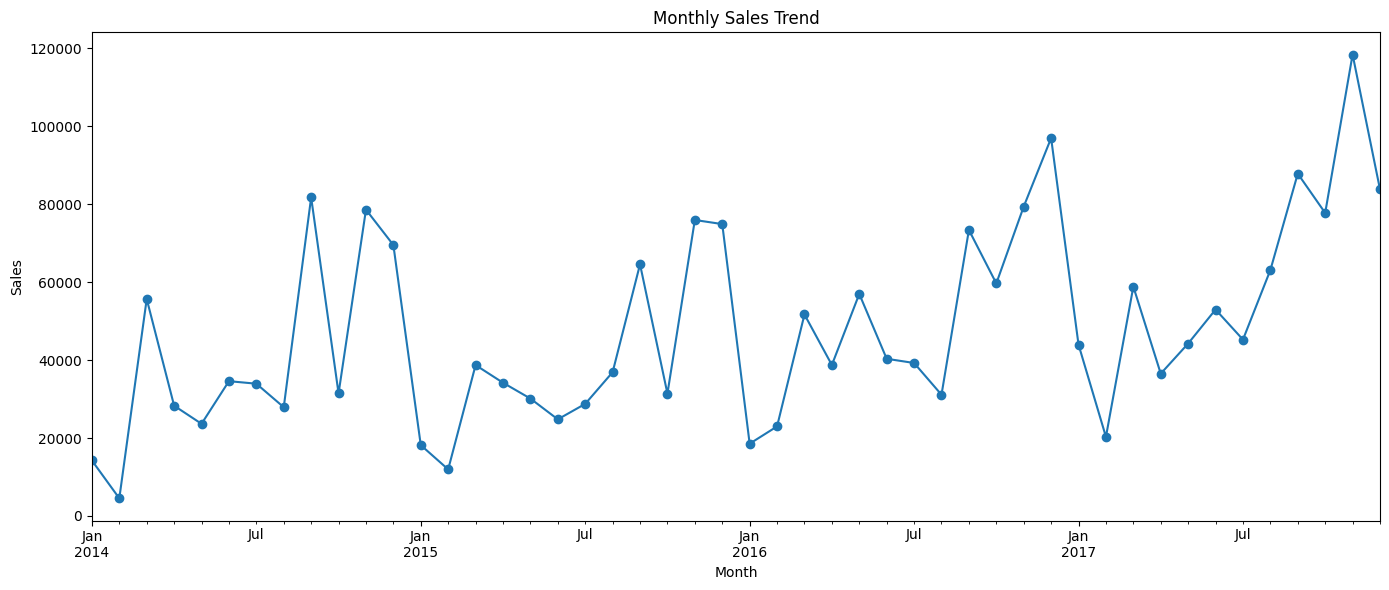

In [50]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid=True
plt.tight_layout()
plt.show

 Year-wise sales comparison

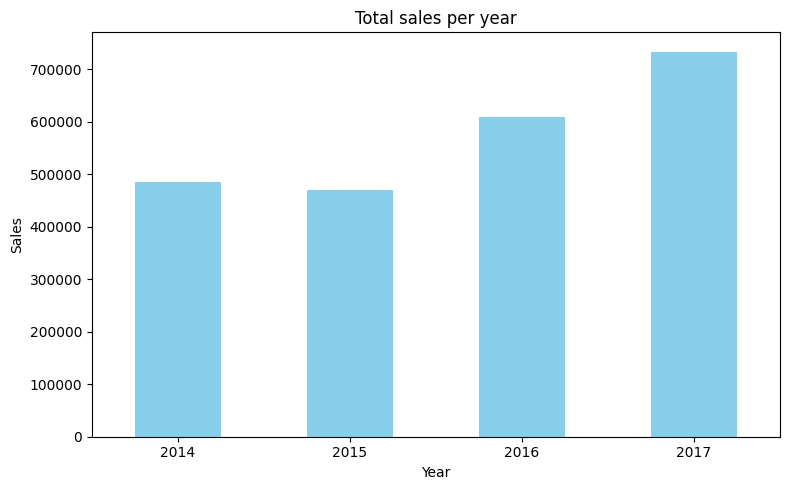

In [51]:
yearly_sales = df.groupby("Year")['Sales'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind = 'bar', color = 'skyblue')
plt.title("Total sales per year")
plt.ylabel("Sales")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid=True
plt.tight_layout()
plt.show()

**Profit by Category and Sub-Category**

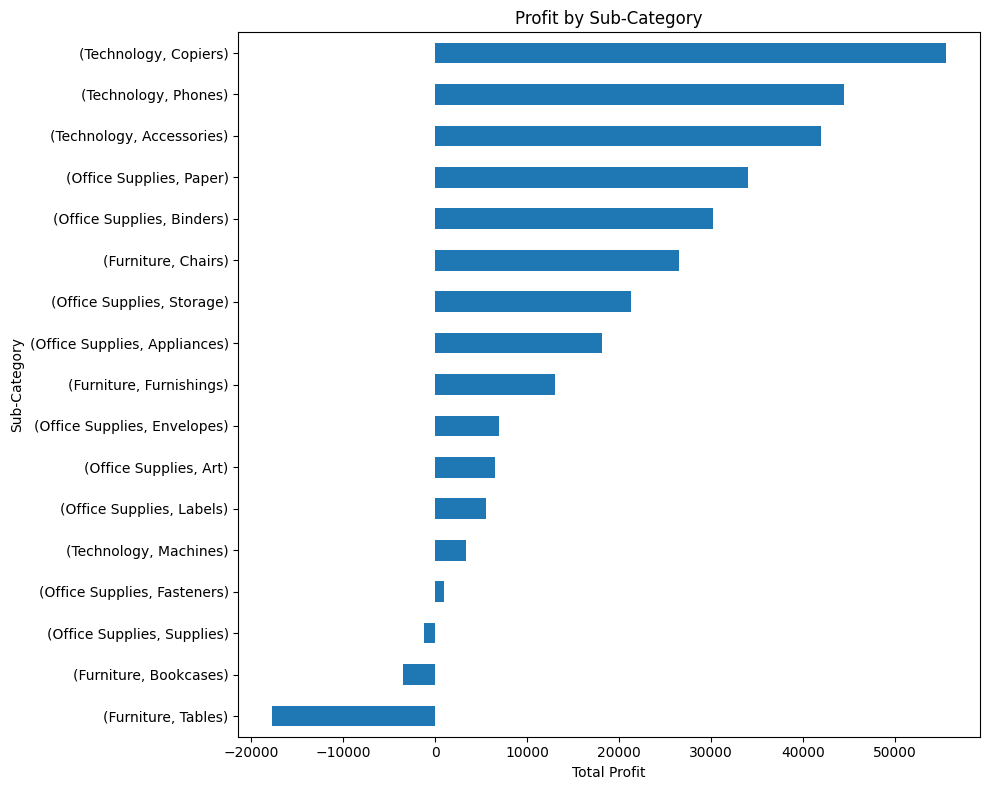

In [52]:
category_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values()

# Plot
category_profit.plot(kind='barh', figsize=(10, 8))
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.grid=True
plt.show()


**Profit by Region**

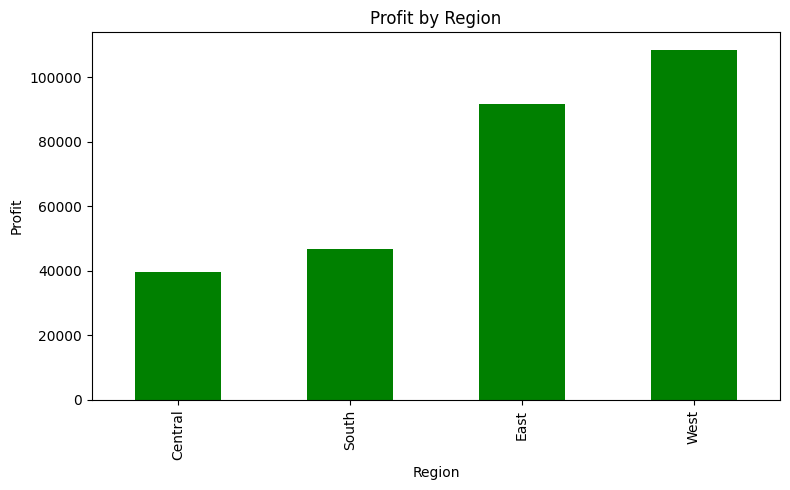

In [53]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

region_profit.plot(kind = 'bar', color = 'Green', figsize = (8,5))
plt.title("Profit by Region")
plt.ylabel("Profit")
plt.grid=True
plt.tight_layout()
plt.show()

**Discount vs Profit Scatter Plot**

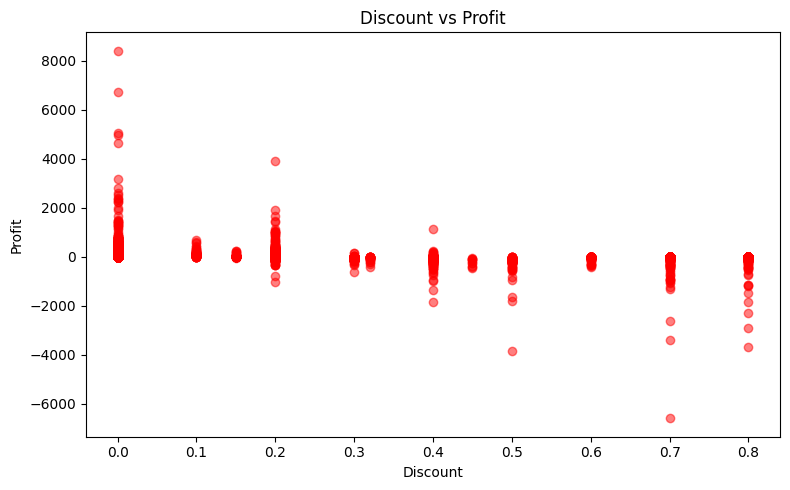

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'],df['Profit'], alpha=0.5, color='red')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid=True
plt.tight_layout()
plt.show()

## RFM Analysis (Customer Segmentation)

In [55]:
import pandas as pd
import datetime as dt

#copy of original df
rfm_data = df.copy()

# convert 'Order Date' to datetime
rfm_data['Order date'] = pd.to_datetime(rfm_data['Order Date'])

# Set reference date (latest order date + 1 day)
ref_date = rfm_data['Order date'].max() +pd.Timedelta(days=1)

# group by customer ID and calculate RFM metrics
rfm = rfm_data.groupby('Customer ID').agg({
    'Order Date': lambda x: (ref_date - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
    'Sales': 'sum'          # Monetary
}).reset_index()

#rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

#Display first few rows
rfm.head()

Customer ID  Recency  Frequency  Monetary
0    AA-10315      185          5  5563.560
1    AA-10375       20          9  1056.390
2    AA-10480      260          4  1790.512
3    AA-10645       56          6  5086.935
4    AB-10015      416          3   886.156

**Score Each RFM Column (1 to 5)**

In [56]:
# Score each column from 1 to 5
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combine RFM scores
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1).astype(int)

rfm.head()


Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0    AA-10315      185          5  5563.560       2       2       5   
1    AA-10375       20          9  1056.390       5       5       2   
2    AA-10480      260          4  1790.512       1       1       3   
3    AA-10645       56          6  5086.935       3       3       5   
4    AB-10015      416          3   886.156       1       1       1   

  RFM_Segment  RFM_Score  
0         225          9  
1         552         12  
2         113          5  
3         335         11  
4         111          3

**Classify Customers**

In [57]:
# Define segments based on RFM score
def segment_customer(score):
    if score >= 13:
        return 'Loyal'
    elif score >= 10:
        return 'Valuable'
    elif score >= 6:
        return 'Regular'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

rfm['Segment'].value_counts()


Segment
Regular     279
Valuable    254
At Risk     136
Loyal       124
Name: count, dtype: int64

**Visualize Segments**

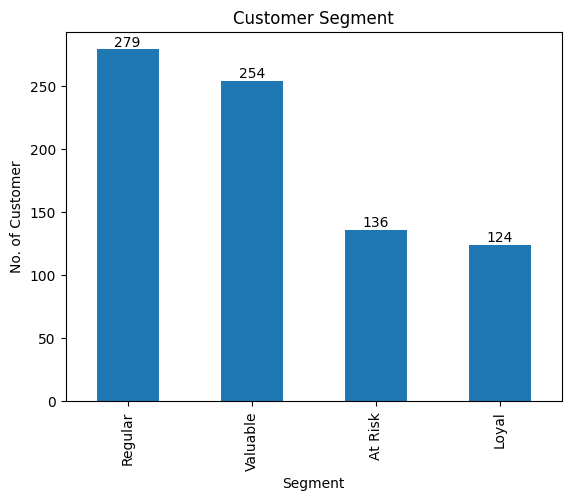

In [58]:
import matplotlib.pyplot as plt

# Plot Segment Distribution
ax = rfm['Segment'].value_counts().plot(kind = 'bar')
plt.title("Customer Segment")
plt.ylabel("No. of Customer")
ax.bar_label(ax.containers[0])
plt.show()

**Product-Level Analysis**

To analyze the performance of individual products based on sales quantity, revenue, returns, and contribution to overall sales. This will help identify best-selling and underperforming products.



In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()


Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [61]:
# Calculate product-level metrics
product_performance = df.groupby(['Product Name']).agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Add profitability ratio
product_performance['Profit_Margin'] = product_performance['Profit'] / product_performance['Sales']


In [62]:
# Top 10 best-selling products by quantity
top_quantity = product_performance.sort_values(by='Quantity', ascending=False).head(10)

# Top 10 revenue-generating products
top_sales = product_performance.sort_values(by='Sales', ascending=False).head(10)


C:\Users\jatin\AppData\Local\Temp\ipykernel_10252\2097377095.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




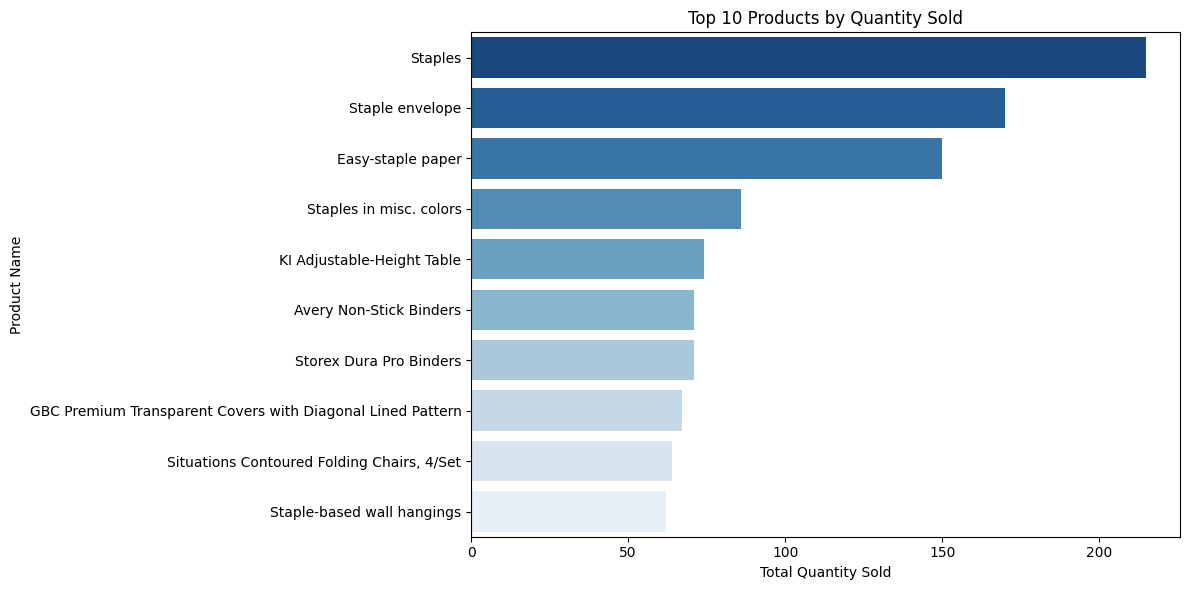

C:\Users\jatin\AppData\Local\Temp\ipykernel_10252\2097377095.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




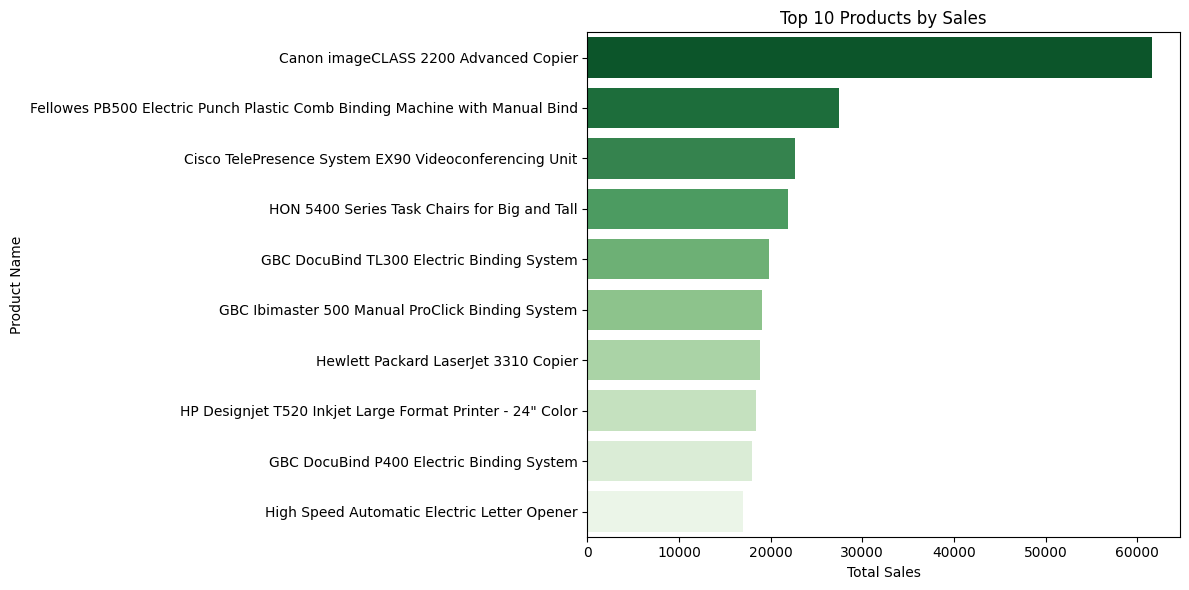

In [63]:
# Plot Top 10 Products by Quantity
plt.figure(figsize=(12,6))
sns.barplot(x='Quantity', y='Product Name', data=top_quantity, palette='Blues_r')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Plot Top 10 Products by Sales
plt.figure(figsize=(12,6))
sns.barplot(x='Sales', y='Product Name', data=top_sales, palette='Greens_r')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [64]:
# Least profitable products (profit margin)
low_profit = product_performance.sort_values(by='Profit_Margin').head(10)

low_profit[['Product Name', 'Sales', 'Profit', 'Profit_Margin']]


Product Name     Sales     Profit  \
605   Eureka Disposable Bags for Sanitaire Vibra Gro...     1.624    -4.4660   
388   Bush Westfield Collection Bookcases, Dark Cher...    90.882  -190.8522   
613                    Euro Pro Shark Stick Mini Vacuum   170.744  -325.6332   
1215                               Okidata B401 Printer   179.991  -251.9874   
1838  Zebra GK420t Direct Thermal/Thermal Transfer P...   703.710  -938.2800   
696                      GBC Plasticlear Binding Covers    68.880   -68.4208   
372   Brother MFC-9340CDW LED All-In-One Printer, Co...   341.991  -319.1916   
603   Epson TM-T88V Direct Thermal Printer - Monochr...  1212.705 -1057.2300   
602                 Epson Perfection V600 Photo Scanner   206.991  -172.4925   
716             GBC VeloBinder Electric Binding Machine   496.018  -411.3320   

      Profit_Margin  
605       -2.750000  
388       -2.100000  
613       -1.907143  
1215      -1.400000  
1838      -1.333333  
696       -0.993333  
372       -0.933333  
603       -0.871795  
602       -0.833333  
716       -0.829268

**Top Revenue-Generating Products**

C:\Users\jatin\AppData\Local\Temp\ipykernel_10252\174465463.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




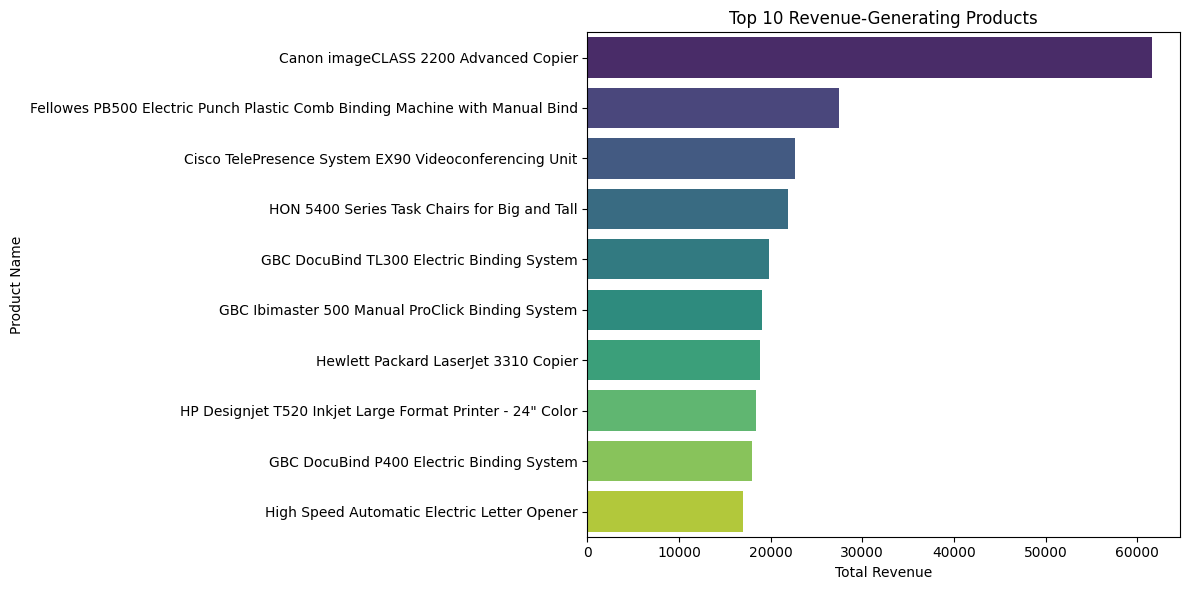

In [66]:
# Group by 'Product Name' and sum the 'Sales'
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for easier plotting
top_products_df = top_products.reset_index().rename(columns={'Sales': 'Total Revenue'})

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y='Product Name', data=top_products_df, palette='viridis')

# Add labels and title
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')

# Show the plot
plt.tight_layout()
plt.show()


## Forecasting

In [67]:
!pip install prophet


In [68]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

00:46:48 - cmdstanpy - INFO - Chain [1] start processing
00:46:48 - cmdstanpy - INFO - Chain [1] done processing


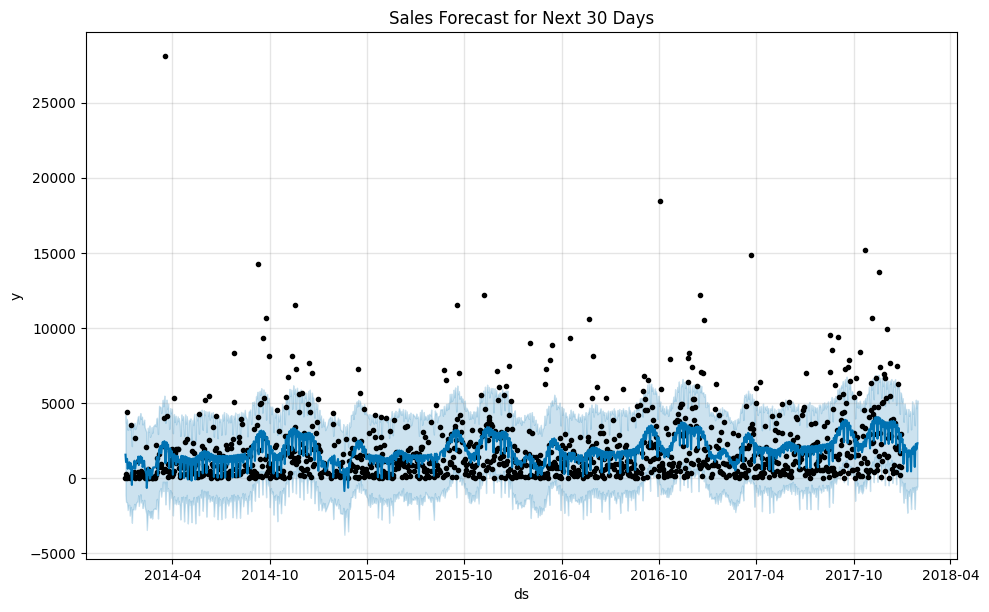

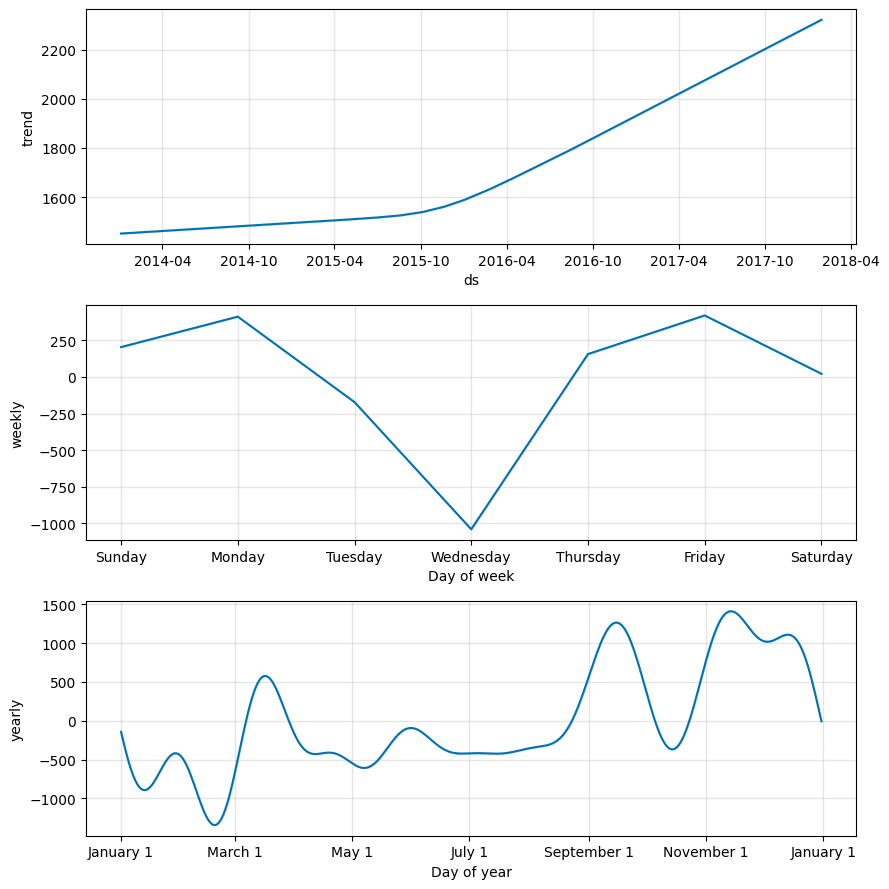

In [69]:
# Load your sales dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')


# Ensure data has Date and Sales columns
# Example: 'Order Date', 'Sales'
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Prepare data for Prophet
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(daily_sales)

# Create future dataframe for next 30 days
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast for Next 30 Days")
plt.show()

# Plot forecast components (trend, weekly seasonality, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Save forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv("sales_forecast_prophet.csv", index=False)
